1) Design model (input, output size, forward pass)
2) Construct loss and optimizer
3) Training loop
    - Forward pass: compute prediction
    - Backward pass: gradients
    - Update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch 1: w = 1.838, loss = 5666.23046875
epoch 11: w = 13.702, loss = 4198.99414062
epoch 21: w = 23.811, loss = 3137.97998047
epoch 31: w = 32.427, loss = 2369.86987305
epoch 41: w = 39.770, loss = 1813.23278809
epoch 51: w = 46.031, loss = 1409.46411133
epoch 61: w = 51.370, loss = 1116.32324219
epoch 71: w = 55.924, loss = 903.32763672
epoch 81: w = 59.808, loss = 748.44952393
epoch 91: w = 63.121, loss = 635.75384521


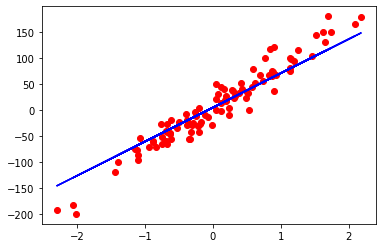

In [5]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)) 
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)

    # loss
    l = criterion(y_pred, y)

    # gradients
    l.backward()

    # update weights
    optimizer.step()

    optimizer.zero_grad()
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0].item():.3f}, loss = {l:.8f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
